In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.shape

(30, 2)

In [4]:
#here renamed the Salary --> salary_hike
df=df.rename({'Salary':'salary_hike'},axis=1)
df

,YearsExperience,salary_hike
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
#Spliting of X and Y
x=df[['YearsExperience']]
y=df[['salary_hike']]

In [6]:
#Exploratory Data Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   salary_hike      30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
df.describe()

,YearsExperience,salary_hike
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
df.head()
df.tail()
df.dtypes

YearsExperience    float64
salary_hike        float64
dtype: object

In [9]:
df.isnull().sum()

YearsExperience    0
salary_hike        0
dtype: int64

<Axes: >

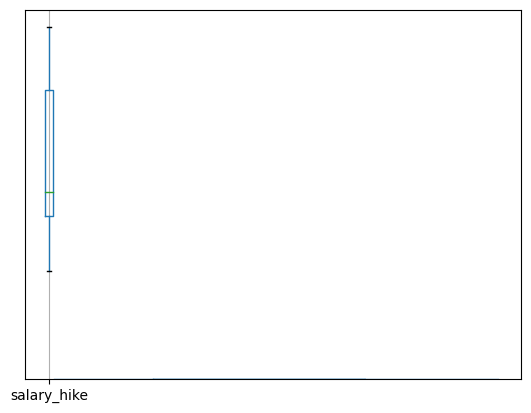

In [10]:
#To find outliers
df.boxplot(column='YearsExperience',vert=False)
df.boxplot(column='salary_hike')

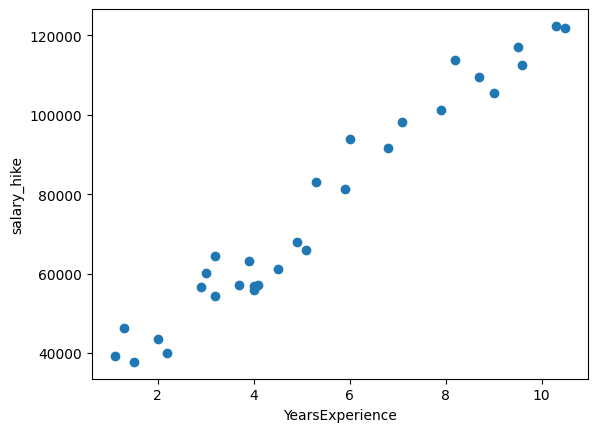

In [11]:
#Data visulation
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel("YearsExperience")
plt.ylabel("salary_hike")
plt.show()

In [12]:
#colinear
df.corr()

,YearsExperience,salary_hike
YearsExperience,1.000000,0.978242
salary_hike,0.978242,1.000000


In [14]:
#Model fitting
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)
LR.intercept_
LR.coef_

array([[9449.96232146]])

In [15]:
#Predectoin
df[["salary_hike"]]
salary_pred = LR.predict(x)
y

,salary_hike
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


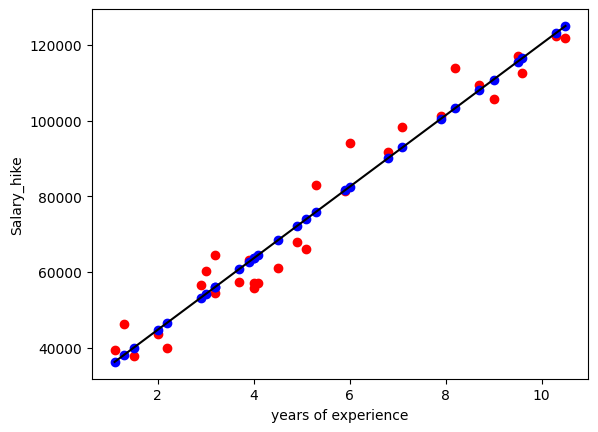

In [16]:
#constructing regrassion line between model predicted values and original values
import matplotlib.pyplot as plt
plt.scatter(x,y,color='red')
plt.scatter(x,y=salary_pred,color='blue')
plt.plot(x,salary_pred,color='black')
plt.xlabel('years of experience')
plt.ylabel('Salary_hike')
plt.show()

In [17]:
#Finding Errors by using Metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y,salary_pred)
R2= r2_score(y, salary_pred)
print("Mean_squared_error:", mse.round(3))
print("Root Mean Sqaure error:",np.sqrt(mse).round(3))
print("R square:", R2.round(3))

Mean_squared_error: 31270951.722
Root Mean Sqaure error: 5592.044
R square: 0.957


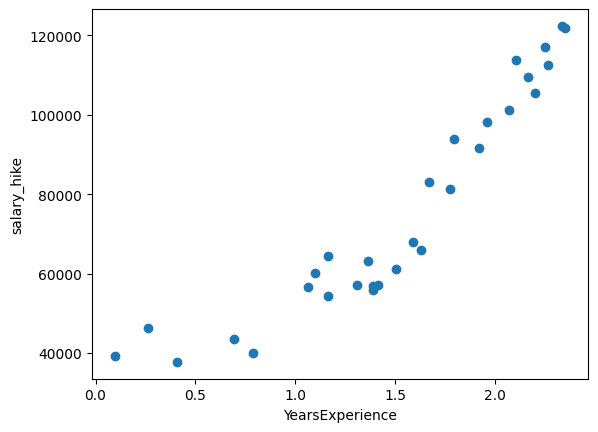

In [18]:
#Applying log transfromation to x

x_log = np.log(df[["YearsExperience"]])

#Data visulation
import matplotlib.pyplot as plt
plt.scatter(x_log,y)
plt.xlabel("YearsExperience")
plt.ylabel("salary_hike")
plt.show()

In [20]:
#Model fitting
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_log,y)
LR.intercept_
LR.coef_

array([[40581.98795978]])

In [22]:
#Predectoin
df[["salary_hike"]]
salary_pred = LR.predict(x_log)
y

,salary_hike
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


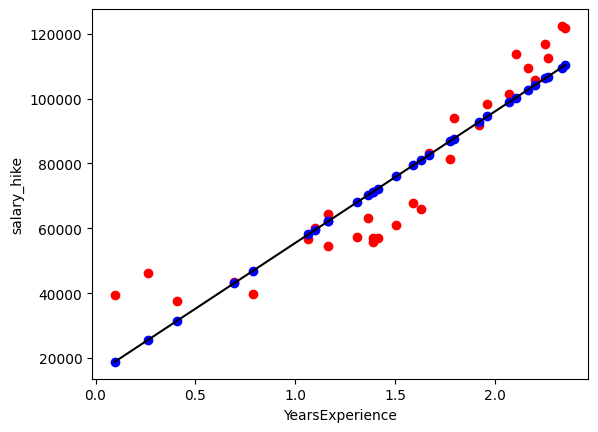

In [23]:
#constructing regrassion line between model predicted values and original values
import matplotlib.pyplot as plt
plt.scatter(x_log,y,color='red')
plt.scatter(x_log,salary_pred,color='blue')
plt.plot(x_log,salary_pred,color='black')
plt.xlabel('YearsExperience')
plt.ylabel('salary_hike')
plt.show()

In [24]:
#Finding Errors by using Metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y,salary_pred)
R2= r2_score(y, salary_pred)
print("Mean_squared_error:", mse.round(3))
print("Root Mean Sqaure error:",np.sqrt(mse).round(3))
print("R square:", R2.round(3))

Mean_squared_error: 106149618.722
Root Mean Sqaure error: 10302.894
R square: 0.854


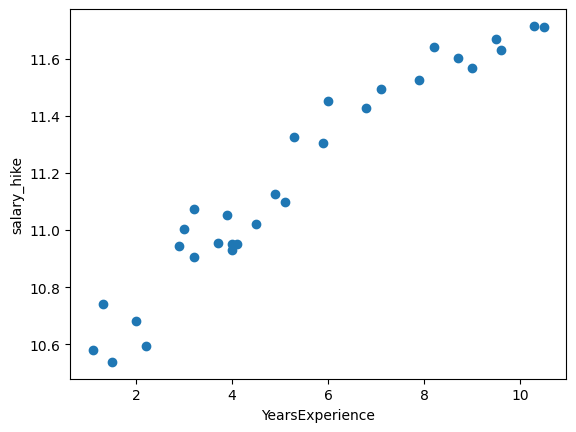

In [25]:
#Applying log transfromation to y

y_log = np.log(df[["salary_hike"]])

#Data visulation
import matplotlib.pyplot as plt
plt.scatter(x,y_log)
plt.xlabel("YearsExperience")
plt.ylabel("salary_hike")
plt.show()

In [27]:
#Model fitting
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y_log)
LR.intercept_
LR.coef_

array([[0.12545289]])

In [28]:
#Predectoin
df[["YearsExperience"]]
deli_pred = LR.predict(x)
y_log

,salary_hike
0,10.580073
1,10.740843
2,10.538237
3,10.681091
4,10.593906
5,10.944506
6,11.004597
7,10.904946
8,11.073567
9,10.954117


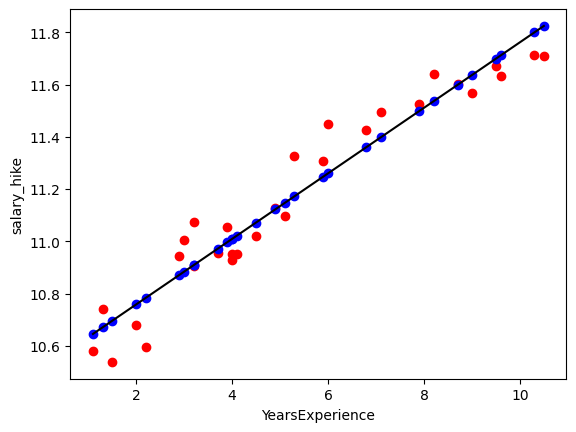

In [29]:
#constructing regrassion line between model predicted values and original values
import matplotlib.pyplot as plt
plt.scatter(x,y_log,color='red')
plt.scatter(x,deli_pred,color='blue')
plt.plot(x,deli_pred,color='black')
plt.xlabel('YearsExperience')
plt.ylabel('salary_hike')
plt.show()

In [30]:
#Finding Errors by using Metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_log,salary_pred)
R2= r2_score(y_log,salary_pred)
print("Mean_squared_error:", mse.round(3))
print("Root Mean Sqaure error:",np.sqrt(mse).round(3))
print("R square:", R2.round(3))

Mean_squared_error: 6395090081.219
Root Mean Sqaure error: 79969.307
R square: -48642806750.685


In [31]:
#Applying Sq Root Transformation of X x and y
x_sq = np.sqrt(df[["YearsExperience"]])
y_sq = np.sqrt(df[["salary_hike"]])

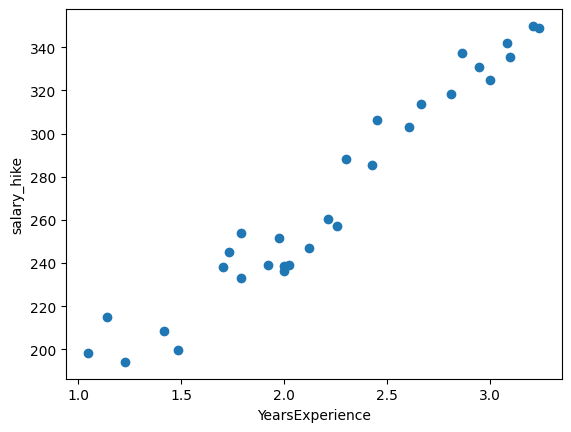

In [32]:
#Data visulation
import matplotlib.pyplot as plt
plt.scatter(x_sq,y_sq)
plt.xlabel("YearsExperience")
plt.ylabel("salary_hike")
plt.show()

In [33]:
#Model fitting
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_sq,y_sq)
LR.intercept_
LR.coef_

array([[75.6269319]])

In [34]:
#Predectoin
df[["YearsExperience"]]
salry_pred = LR.predict(x_sq)
y_sq

,salary_hike
0,198.350700
1,214.953483
2,194.244691
3,208.626460
4,199.727314
5,237.995798
6,245.254969
7,233.334524
8,253.860198
9,239.142217


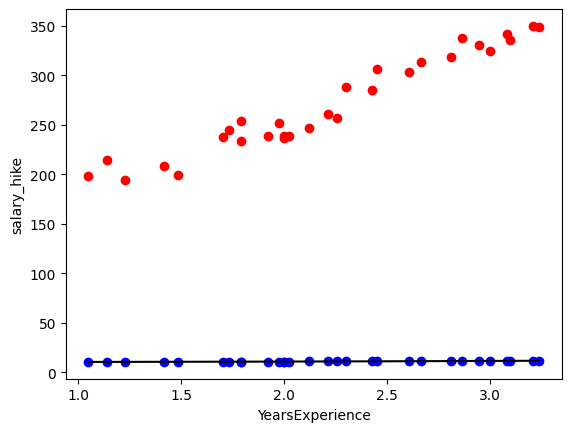

In [35]:
#constructing regrassion line between model predicted values and original values
import matplotlib.pyplot as plt
plt.scatter(x_sq,y_sq,color='red')
plt.scatter(x_sq,deli_pred,color='blue')
plt.plot(x_sq,deli_pred,color='black')
plt.xlabel('YearsExperience')
plt.ylabel('salary_hike')
plt.show()

In [36]:
#Finding Errors by using Metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_sq,salary_pred)
R2= r2_score(y_sq, salary_pred)
print("Mean_squared_error:", mse.round(3))
print("Root Mean Sqaure error:",np.sqrt(mse).round(3))
print("R square:", R2.round(3))

Mean_squared_error: 6353352438.619
Root Mean Sqaure error: 79707.92
R square: -2664417.95
